In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

In [30]:
df = pd.read_csv("death-rates-from-air-pollution.csv")
display(df.head(), df.tail())

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173
6467,Zimbabwe,ZWE,2017,125.028843,96.235996,26.166182,4.052495


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           6468 non-null   object 
 1   Code                                             5488 non-null   object 
 2   Year                                             6468 non-null   int64  
 3   Air pollution (total) (deaths per 100,000)       6468 non-null   float64
 4   Indoor air pollution (deaths per 100,000)        6468 non-null   float64
 5   Outdoor particulate matter (deaths per 100,000)  6468 non-null   float64
 6   Outdoor ozone pollution (deaths per 100,000)     6468 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 353.8+ KB


So it looks like the data is not missing much, except some countries are missing their code.

In [5]:
df.describe()

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,87.804083,50.481504,35.114982,3.370793
std,8.078372,57.845436,58.722565,18.207369,4.325445
min,1990.000000,8.401696,0.003859,7.542899,0.000000
25%,1996.750000,41.016114,2.002779,21.955108,1.302905
50%,2003.500000,72.653557,23.737851,30.977196,2.338684
75%,2010.250000,127.607177,90.138777,44.604181,3.515409
max,2017.000000,318.463253,293.509187,132.815726,37.356034


In [6]:
df['Entity'].nunique()

231

We have data from 1990 to 2017 and there are 231 unique countries in the dataset.

In [18]:
#create a pivot table I can aggregate values for all countries together and see how the death totals have changed over the years

df_totals = df.pivot_table(index = 'Year',  values = df.columns[3:], aggfunc = np.sum)
df_totals.reset_index(level = 0, inplace=True)
df_totals.head(2)

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)"
0,1990,24737.753176,15780.116762,927.643506,8376.330312
1,1991,24467.903027,15446.906346,920.459216,8441.984587


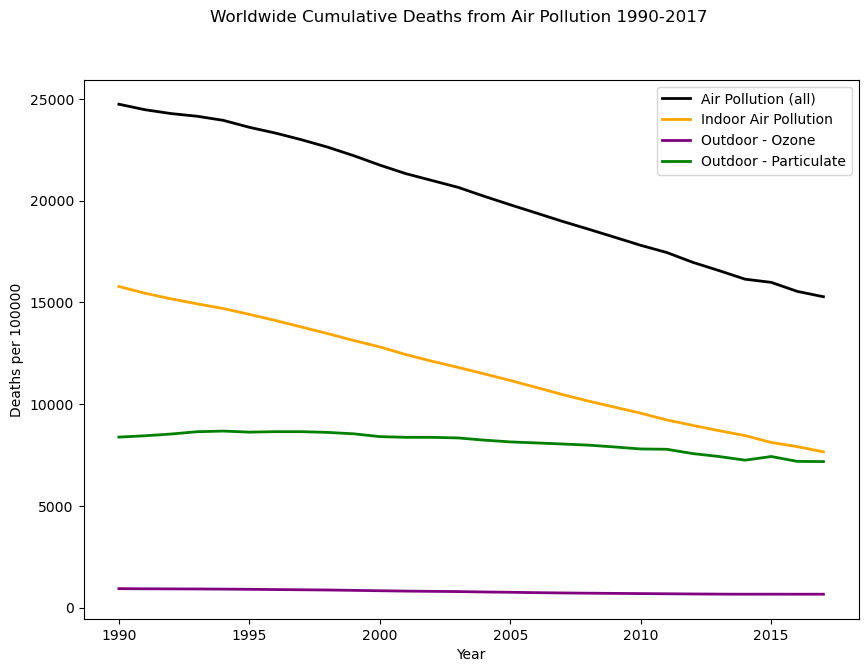

In [77]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,7))

ax.plot("Year","Air pollution (total) (deaths per 100,000)", data=df_totals, color='black', linewidth=2, label="Air Pollution (all)")
ax.plot("Year","Indoor air pollution (deaths per 100,000)", data=df_totals, color='orange', linewidth=2, label="Indoor Air Pollution")
ax.plot("Year","Outdoor ozone pollution (deaths per 100,000)", data=df_totals, color='purple', linewidth=2, label="Outdoor - Ozone")
ax.plot("Year","Outdoor particulate matter (deaths per 100,000)", data=df_totals, color='green', linewidth=2, label="Outdoor - Particulate")
ax.set_ylabel("Deaths per 100000")
ax.set_xlabel("Year")
fig.suptitle("Worldwide Cumulative Deaths from Air Pollution 1990-2017")
ax.legend();

In [51]:
df1 = df.pivot(index = 'Entity', columns='Year', values = df.columns[3:])
df1.drop(["Air pollution (total) (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)", 
          "Outdoor particulate matter (deaths per 100,000)"], axis=1, inplace=True)
df1["Total"] = df1.iloc[:,1:].sum(1)
df1 = df1.sort_values("Total")
display(df1.head(3), df1.tail(10))

Indoor air pollution (deaths per 100,000)                      \
Year                                         1990      1991      1992   
Entity                                                                  
Qatar                                    0.070449  0.060608  0.052286   
Lebanon                                  0.212150  0.179129  0.153022   
Canada                                   0.146160  0.134791  0.124798   

                                                                               \
Year         1993      1994      1995      1996      1997      1998      1999   
Entity                                                                          
Qatar    0.047030  0.041691  0.037168  0.033138  0.029492  0.026495  0.025906   
Lebanon  0.134296  0.115189  0.098186  0.083034  0.073405  0.064511  0.057400   
Canada   0.119108  0.110767  0.101595  0.094623  0.087754  0.082449  0.075128   

         ...                                                              \
Year     ...      2009      2010      2011      2012      2013      2014   
Entity   ...                                                               
Qatar    ...  0.009520  0.008540  0.008077  0.006635  0.006179  0.006037   
Lebanon  ...  0.024443  0.021972  0.019985  0.018005  0.015856  0.014464   
Canada   ...  0.038083  0.034065  0.031916  0.030710  0.028803  0.027696   

                                          Total  
Year         2015      2016      2017            
Entity                                           
Qatar    0.004741  0.004404  0.003859  0.552958  
Lebanon  0.012840  0.012016  0.010723  1.454611  
Canada   0.027058  0.025129  0.024770  1.677077  

[3 rows x 29 columns]

Indoor air pollution (deaths per 100,000)  \
Year                                                          1990   
Entity                                                               
Guinea                                                  192.987110   
Madagascar                                              184.689178   
Sierra Leone                                            197.209786   
Central African Republic                                202.031826   
Guinea-Bissau                                           218.923650   
Somalia                                                 214.196666   
Oceania                                                 219.030499   
Solomon Islands                                         234.911665   
Afghanistan                                             250.362910   
Papua New Guinea                                        293.509187   

                                                                          \
Year                            1991        1992        1993        1994   
Entity                                                                     
Guinea                    188.808988  187.438157  185.091122  183.344757   
Madagascar                186.075752  186.568346  191.994443  186.939759   
Sierra Leone              196.493997  195.274964  188.291800  185.674359   
Central African Republic  200.593559  197.185638  199.011800  197.305540   
Guinea-Bissau             215.275262  213.658929  210.435433  209.526152   
Somalia                   220.631046  226.791199  229.190095  231.974510   
Oceania                   218.139938  215.580265  212.752654  209.244642   
Solomon Islands           232.581523  228.290485  224.641028  220.810605   
Afghanistan               242.575125  232.043878  231.648134  238.837177   
Papua New Guinea          291.434765  287.078348  282.084282  275.743778   

                                                                          \
Year                            1995        1996        1997        1998   
Entity                                                                     
Guinea                    179.807555  177.884531  175.440134  172.520028   
Madagascar                185.434814  186.582953  185.882534  187.442268   
Sierra Leone              184.384127  182.429363  184.948815  184.197277   
Central African Republic  196.173832  196.742959  195.086537  193.385880   
Guinea-Bissau             206.381115  203.489597  200.406104  199.138823   
Somalia                   234.198564  232.479777  228.911156  224.555568   
Oceania                   207.706828  205.215125  203.769618  203.232444   
Solomon Islands           216.034373  212.743087  208.933342  206.580475   
Afghanistan               239.906599  238.512050  238.113520  238.680150   
Papua New Guinea          272.859259  268.099343  264.801098  264.427893   

                                      ...                                      \
Year                            1999  ...        2009        2010        2011   
Entity                                ...                                       
Guinea                    172.455026  ...  159.305726  158.755321  157.279843   
Madagascar                184.800333  ...  155.371894  154.184798  152.884381   
Sierra Leone              182.423685  ...  164.710526  162.828508  158.443850   
Central African Republic  192.531456  ...  175.176977  172.835977  168.645174   
Guinea-Bissau             197.359081  ...  169.653547  165.630456  160.380191   
Somalia                   217.436125  ...  172.308118  169.221339  165.473663   
Oceania                   203.230378  ...  192.276203  188.366395  185.084455   
Solomon Islands           204.384578  ...  189.359908  186.891534  182.677890   
Afghanistan               238.539294  ...  178.930420  171.788163  163.026306   
Papua New Guinea          264.159358  ...  252.304079  247.131384  242.873449   

                                                                          \
Year  

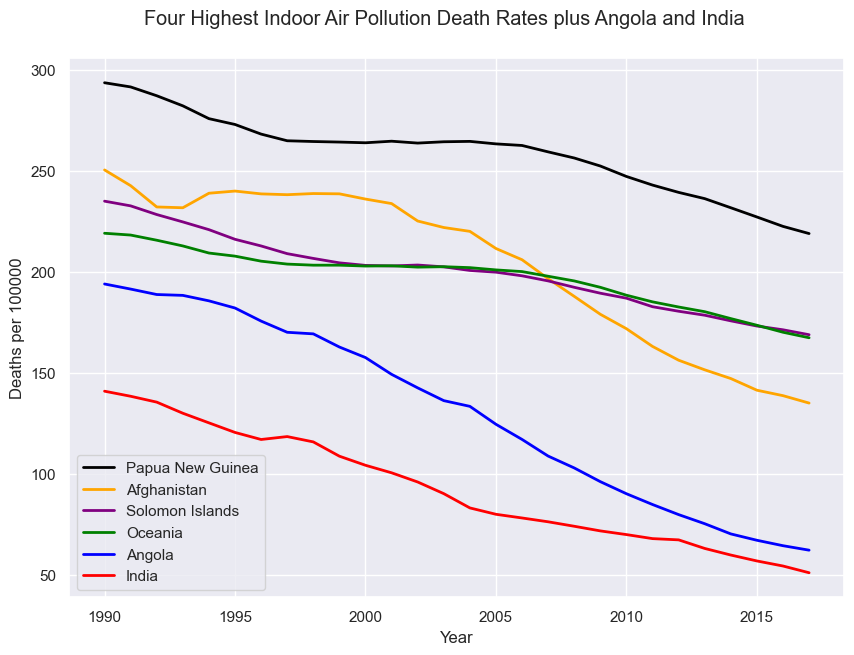

In [109]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,7))
#sns.barplot(x='Entity', y="Total", ax=ax2, data=df_g.tail())
years=list(df1.columns.get_level_values("Year"))
years = years[:-1]
#png = df1.loc[("Papua New Guinea","Indoor air pollution (deaths per 100,000)")]

ax.plot(df1.loc[("Papua New Guinea","Indoor air pollution (deaths per 100,000)")], color='black', linewidth=2, label="Papua New Guinea")
ax.plot(df1.loc[("Afghanistan","Indoor air pollution (deaths per 100,000)")], color='orange', linewidth=2, label="Afghanistan")
ax.plot(df1.loc[("Solomon Islands","Indoor air pollution (deaths per 100,000)")], color='purple', linewidth=2, label="Solomon Islands")
ax.plot(df1.loc[("Oceania","Indoor air pollution (deaths per 100,000)")], color='green', linewidth=2, label="Oceania")
ax.plot(df1.loc[("Angola","Indoor air pollution (deaths per 100,000)")], color='blue', linewidth=2, label="Angola")
ax.plot(df1.loc[("India","Indoor air pollution (deaths per 100,000)")], color='red', linewidth=2, label="India")

ax.set_ylabel("Deaths per 100000")
ax.set_xlabel("Year")
fig.suptitle("Four Highest Indoor Air Pollution Death Rates plus Angola and India", y=0.95)
ax.legend();